# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df['flag_sick'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_sick
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [4]:
tab = pd.crosstab(df['sex'], df['flag_sick'], margins= True)
tab

flag_sick,0,1,All
sex,,,
0.0,72,25,97
1.0,92,114,206
All,164,139,303


In [5]:
# Renomeando as colunas e o índice
tab = tab.rename(
    columns={0: 'Healthy', 1: 'Sick', 'All': 'All'},  # Renomeia as colunas
    index={0.0: 'Female', 1.0: 'Male', 'All': 'All'}  # Renomeia o índice
)
tab

flag_sick,Healthy,Sick,All
sex,,,
Female,72,25,97
Male,92,114,206
All,164,139,303


In [6]:
#Total Healthy:
total_healthy = tab.loc['All', 'Healthy']

print(f"Total Healthy: {total_healthy}")

Total Healthy: 164


In [7]:
#Total Sick:
total_sick = tab.loc['All', 'Sick']

print(f"Total Sick: {total_sick}")

Total Sick: 139


In [8]:
#Total
total = tab.loc['All', 'All']

print(f"Total: {total}")

Total: 303


In [9]:
#Mean of sick
sick_mean = tab['Sick'].mean()
sick_mean

92.66666666666667

In [10]:
#Odds 
tab['Odds'] = tab['Sick']/tab['Healthy']
tab

flag_sick,Healthy,Sick,All,Odds
sex,,,,
Female,72,25,97,0.347222
Male,92,114,206,1.239130
All,164,139,303,0.847561


In [11]:
#Odds Ratio 
tab.loc['Male', 'Odds']

1.2391304347826086

In [12]:
tab['RC_vs_Male']= tab['Odds']/tab.loc['Male', 'Odds']
tab

flag_sick,Healthy,Sick,All,Odds,RC_vs_Male
sex,,,,,
Female,72,25,97,0.347222,0.280214
Male,92,114,206,1.239130,1.000000
All,164,139,303,0.847561,0.683997


In [13]:
#Logito (LOG(Odds))
tab['logito'] = np.log(tab['Odds'])
tab.logito

sex
Female   -1.057790
Male      0.214410
All      -0.165392
Name: logito, dtype: float64

In [14]:
#Logito Odds Ratio 
tab['logito_ratio'] = np.log(tab['RC_vs_Male'])
tab.logito_ratio

sex
Female   -1.272200
Male      0.000000
All      -0.379802
Name: logito_ratio, dtype: float64

In [15]:
tab

flag_sick,Healthy,Sick,All,Odds,RC_vs_Male,logito,logito_ratio
sex,,,,,,,
Female,72,25,97,0.347222,0.280214,-1.057790,-1.272200
Male,92,114,206,1.239130,1.000000,0.214410,0.000000
All,164,139,303,0.847561,0.683997,-0.165392,-0.379802


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [16]:
#Age Columns
df.age.sort_values()

132    29.0
101    34.0
225    34.0
283    35.0
117    35.0
       ... 
42     71.0
103    71.0
233    74.0
257    76.0
161    77.0
Name: age, Length: 303, dtype: float64

In [17]:
#Categorize Age in 5 groups:
df['age_group'] = pd.cut(df['age'], bins=5, labels=['18-30', '31-43', '44-56', '57-68', '69-80'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_sick,age_group
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,57-68
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,57-68
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,57-68
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,18-30
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,31-43


In [18]:
#Crosstab Age group vs Flag Sick
tab_age = pd.crosstab(df['age_group'], df['flag_sick'], margins= True)

#Renaming columns:
tab_age = tab_age.rename(
        columns={0: 'Healthy', 1: 'Sick'})

tab_age

flag_sick,Healthy,Sick,All
age_group,,,
18-30,8,3,11
31-43,50,21,71
44-56,56,41,97
57-68,40,67,107
69-80,10,7,17
All,164,139,303


In [19]:
#Odds 
tab_age['Odds'] = tab_age['Sick']/tab_age['Healthy']
tab_age

flag_sick,Healthy,Sick,All,Odds
age_group,,,,
18-30,8,3,11,0.375000
31-43,50,21,71,0.420000
44-56,56,41,97,0.732143
57-68,40,67,107,1.675000
69-80,10,7,17,0.700000
All,164,139,303,0.847561


In [20]:
#Odds Ratio 
tab_age.loc['57-68', 'Odds']

1.675

In [21]:
tab_age['RC_vs_57-68']= tab_age['Odds']/tab_age.loc['57-68', 'Odds']
tab_age

flag_sick,Healthy,Sick,All,Odds,RC_vs_57-68
age_group,,,,,
18-30,8,3,11,0.375000,0.223881
31-43,50,21,71,0.420000,0.250746
44-56,56,41,97,0.732143,0.437100
57-68,40,67,107,1.675000,1.000000
69-80,10,7,17,0.700000,0.417910
All,164,139,303,0.847561,0.506007


In [22]:
#Logito (LOG(Odds))
tab_age['logito'] = np.log(tab_age['Odds'])
tab_age.logito

age_group
18-30   -0.980829
31-43   -0.867501
44-56   -0.311780
57-68    0.515813
69-80   -0.356675
All     -0.165392
Name: logito, dtype: float64

In [23]:
#Logito Odds Ratio 
tab_age['logito_ratio'] = np.log(tab_age['RC_vs_57-68'])
tab_age.logito_ratio

age_group
18-30   -1.496642
31-43   -1.383314
44-56   -0.827593
57-68    0.000000
69-80   -0.872488
All     -0.681206
Name: logito_ratio, dtype: float64

In [24]:
#Mean of age
age_mean = df['age'].mean()
age_mean

54.43894389438944

3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

<Figure size 1000x600 with 0 Axes>

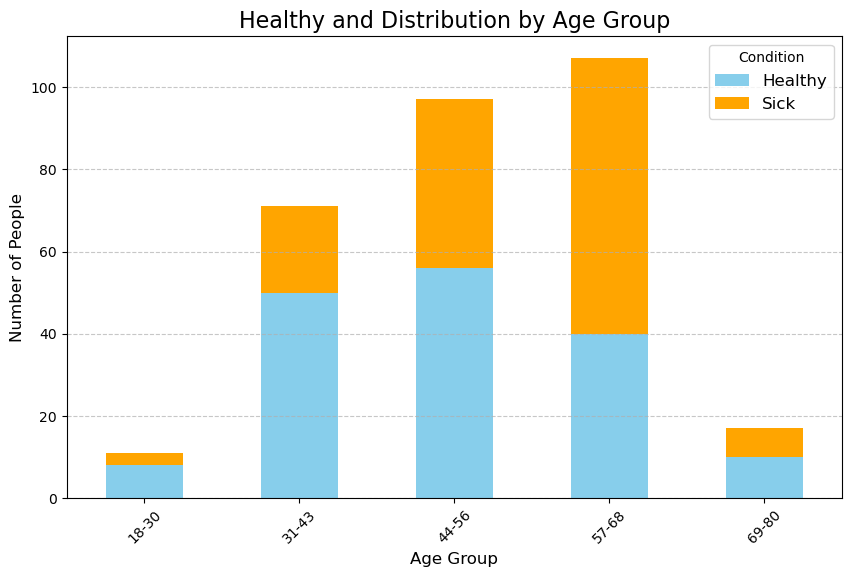

In [25]:
#Graphic Visualization
plt.figure(figsize=(10, 6))

# Bar Plot of Health Condition by Age groups
tab_age.iloc[:-1, :2].plot(kind='bar', stacked=True, color=['skyblue', 'orange'], figsize=(10, 6))
plt.title('Healthy and Distribution by Age Group', fontsize=16)
plt.ylabel('Number of People', fontsize=12)
plt.xlabel('Age Group', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Condition', fontsize=12)
plt.show()


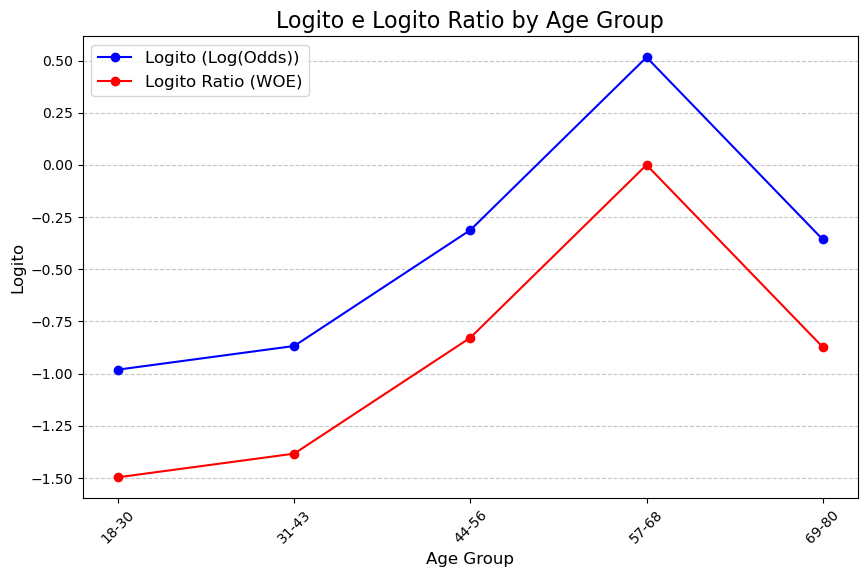

In [26]:
# Logito Graphic
plt.figure(figsize=(10, 6))
plt.plot(tab_age.index[:-1], tab_age['logito'][:-1], marker='o', color='blue', label='Logito (Log(Odds))')
plt.plot(tab_age.index[:-1], tab_age['logito_ratio'][:-1], marker='o', color='red', label='Logito Ratio (WOE)')
plt.title('Logito e Logito Ratio by Age Group', fontsize=16)
plt.ylabel('Logito', fontsize=12)
plt.xlabel('Age Group', fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()
